# Notes of Neural Network (NN)

By: Haiyang Yu, yhyoscar@gmail.com, 09/16/2017

## 1. Theory
### 1.1 Simple description

Consider a black-box with input and output, as shown below, a neural network is a "model" that "learns" the mechanism inside of this black-box, based on limited datasets of input and output.

<img src="fig1_bb.png">

### 1.2 Mathematic perspective

Neural network is a speific type of parameterized functions (mapping) $f(\cdot): \mathbb{R}^{n_i} \to  \mathbb{R}^{n_o}$ that is consisted by linear projections and 1D-activation functions.

Given limited number of samples of input ($x^{(i)} \in X \subset \mathbb{R}^{n_i}$) and output ($y^{(i)} \in Y \subset \mathbb{R}^{n_o}$), where $i=1,2,...,m$ (m is the number of samples), the task of the NN algorithm is to optimize (learn) the parameters (weights) in the NN. 

The following diagram shows a general framework of neural networks with L layers:

<img src="fig2_nn.png">

Where, the square brackets [] in the superscripts represent the layer; the green thick arrows represent the linear transformation, with W and b as the weights and biases, respectively; the red cycles represent the neurons, where 1D-activation functions $g(z)$ works to project the variable $z$ to activated variable $a$; the number $n_{l}$ on the top reprents the dimension number of the $l^{th}$ layer.

### 1.3 Core algorithm

The core calculations includes three steps: forward propagation, back propagation, and gradient descent optimization. The forward propagation moves from left to right, and finally gets the loss (cost) functions. The back propation calculates the errors from right to left, and finally gets the partial derivative of cost function to each parameter (W and b). Here, we take the calculation from the $[l]^{th}$ layer ($a^{[l]}$) to the $[l+1]^{th}$ layer ($a^{[l+1]}$) as an example:

a) Forward propagation

$z^{[l+1]} = W^{[l+1]} a^{[l]} + b^{[l+1]}$

$a^{[l+1]} = g^{[l+1]}(z^{[l+1]})$

b) Back propagation

$\delta z^{[l+1]} = \delta a^{[l+1]} \circ g'(z^{[l+1]})$

$\delta W^{[l+1]} = \frac{1}{m} \delta z^{[l+1]} a^{[l]T} $

$\delta b^{[l+1]} = \frac{1}{m} \sum_{i=1}^m \delta z^{[l+1](i)} $

$\delta a^{[l]} = W^{[l+1]T} \delta z^{[l+1]}$

c) Gradient descent

$W := W - \alpha \delta W$

$b := b - \alpha \delta b$

Where, $\delta (\cdot)$ represents the partial derivative of the cost function $\frac{\partial J(\hat{y},y)}{\partial (\cdot)}$ (or errors); $\circ$ represents Hadamard product of two matrixes; the sizes of $z^{[l]}, a^{[l]}, \delta z^{[l]}, \delta a^{[l]}$ are $(n_l, m)$; the sizes of $z^{[l+1]}, a^{[l+1]}, \delta z^{[l]}, \delta a^{[l]}$ are $(n_{l+1}, m)$; the size of $W^{[l+1]}$ is $(n_{l+1}, n_l)$; the size of $b^{[l+1]}$ is $(n_{l+1}, 1)$; $\alpha$ is the learning rate.

In practice, the back propagation is from $\delta z^{[l+1]}$ to $\delta z^{[l]}$, and the derivative of the activation function can be writen as a function of the activation function itself: $g'(z) = G[g(z)]$. Therefore, we have the new form of the back propagation algorithm:

$\delta W^{[l+1]} = \frac{1}{m} \delta z^{[l+1]} a^{[l]T} $

$\delta b^{[l+1]} = \frac{1}{m} \sum_{i=1}^m \delta z^{[l+1](i)} $

$\delta z^{[l]} = W^{[l+1]T} \delta z^{[l+1]} \circ G(a^{[l]})$

Where, $G(a^{[l]}) = g'(z^{[l]})$

### 1.4 Compare with linear/logistic regression

If there is only one layer in the neural network (no hidden layer), the NN reduces into linear or logistic regression, depending on the activation function. If identity function $g(x) = x$ is used for the activation function, the NN becomes a linear regression model. One-hidden layer NN could be used as Fourier transform. 

### 1.5 Model parameters

#### 1.5.1 Activation function

Activation functions are the only places that introduce nonlinearities into the NN. Here, we list several classic nonlinear activation functions:

a) Sigmoid function

$g(z) = \frac {1} {1+e^{-z}}$

$g'(z) = \frac {e^z} {(e^z+1)^2} = g(z)[1-g(z)]$

b) Tanh (hyperbolic) function

$g(z) = \frac {e^z - e^{-z}} {e^z + e^{-z}}$

$g'(z) = \frac {4e^{2z}} {(e^{2z}+1)^2} = 1 - g^2(z)$

c) ReLU (rectified linear unit) function

$g(z) = max(0, z)$

$g'(z) = \left\{\begin{array}=1, if z>0  \\0,  else\end{array}\right.$

d) Leaky ReLU (rectified linear unit) function

$g(z) = max(0.01z, z)$

$g'(z) = \left\{\begin{array}=1, if z>0  \\0.01,  else\end{array}\right.$

Empirically, the performance of these activation functions from better to worse is: ReLU ~ Leaky ReLU > Tanh > sigmoid.

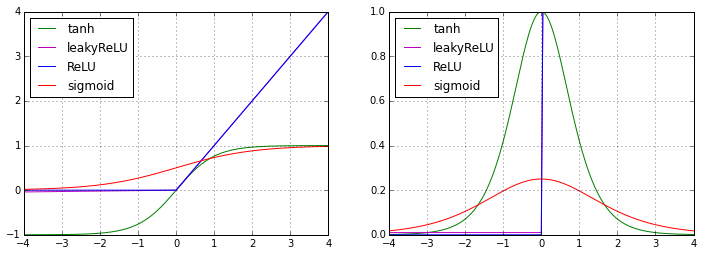

In [4]:
import numpy as np

def factgrad(z, function='sigmoid'):
    if function == 'sigmoid':
        gz = 1.0/(1 + np.exp(-1.0*z) )
        return gz, gz*(1.0-gz)
    if function == 'tanh':
        gz = (np.exp(2.0*z) - 1) / (np.exp(2.0*z) + 1)
        return gz, 1.0-gz*gz
    if function == 'ReLU':
        gz = np.maximum(z*0, z)
        grad = z*0; grad[z>0] = 1.0
        return gz, grad
    if function == 'leakyReLU':
        gz = np.maximum(z*0.01, z)
        grad = z*0 + 0.01; grad[z>0] = 1.0
        return gz, grad

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-4,4,201)
gstrs = {'sigmoid':'r','tanh':'g','ReLU':'b','leakyReLU':'m' }

plt.figure(1, figsize=(12,4))
for k in [0, 1]:
    plt.subplot(1,2,k+1)
    for gstr in gstrs.keys():
        plt.plot(x, factgrad(x, function=gstr)[k], gstrs[gstr])
        plt.grid(True)
        plt.legend(gstrs.keys(), loc=2)

#### 1.5.2 Loss and cost function

The loss function $L(y^{(i)}, \hat{y}^{(i)}) = L(y^{(i)}, a^{[L](i)}) $ for one pair of samples $(x^{(i)}, y^{(i)})$, (i=1,2,...,m)  can be defined as two types:

a) Cross-entropy loss function

$L(y^{(i)}, \hat{y}^{(i)}) = \sum^{n_{L}}_{k=1} [-y^{(i)}_k ln(\hat{y}^{(i)}_k) - (1-y^{(i)}_k) ln(1 - \hat{y}^{(i)}_k) ]$

b) Squared-error loss function

$L(y^{(i)}, \hat{y}^{(i)}) = \frac{1}{2} \sum^{n_{L}}_{k=1} [y^{(i)}_k - \hat{y}^{(i)}_k]^2$

The cost function is the summation of the loss functions for all samples:

$J(Y, \hat{Y}) = \frac{1}{m} \sum^{m}_{i=1} L(y^{(i)}, \hat{y}^{(i)})$

If the cross-entropy form is used for loss function and sigmoid function is used for activation function in the last layer ($L^{th}$ layer), the calculation of the error in the last layer $\delta z^{[L]}$ can be simlified as:

$\delta z^{[L]} = \delta a^{[L]} \circ g'(z^{[L]}) \\
\ \ \ \ \ \ \ = \frac{\partial J}{\partial a^{[L]}} \circ G(a^{[L]}) \\
\ \ \ \ \ \ \ = \frac{a^{[L]}-y}{a^{[L]}(1-a^{[L]})} \circ a^{[L]}(1-a^{[L]}) \\
\ \ \ \ \ \ \ = a^{[L]} - y$

#### 1.5.3 Regularization

To prevent too large parameters and overfitting, regularization term is needed in the cost function:

$J_{R}(Y, \hat{Y}) =  J(Y, \hat{Y}) + \frac{\lambda}{2} \sum_{l=1}^{L} \parallel W^{[l]} \parallel ^ 2$

Then, the partial derivatives of the cost function to the parameters become:

$\delta_R W = \delta W + \lambda W$

$\delta_R b = \delta b$

#### 1.5.4 Learning rate

Learning rate $\alpha$ is a tunable parameter. The large it is, the faster the learning speed is.

#### 1.5.5 Features generation

Additional features can be generated from known features by multiplication: $x_1, x_2 \to x_1^2, x_2^2, x_1 x_2$

#### 1.5.6 Scaling

The input features should be normalized, otherwise the bias terms $b$ will be too large.

#### 1.5.7 Initialization

Initial weights ($W$) and biases ($b$) should be generated randomly to break down the "symmetry".

## 2. Application

### 2.1 My implement of a general framework of NN


In [5]:
class NN:
    def __init__(self, ndims=[1,1], activation=['sigmoid']):
        # weight: [(n[1], n[0]), ... ,(n[l+1], n[l]), ... ,(n[L], n[L-1])]
        # bias:   [(n[1],    1), ... ,(n[l+1],    1), ... ,(n[L],      1)]
        # activation: 'sigmoid', 'tanh', 'ReLU', 'leakyReLU'
        nlayer = len(ndims) - 1
        if len(activation) == 1:
            activation = activation * nlayer
        else:
            if len(activation) != nlayer:
                print 'ERROR: activation should have ', format(nlayer) ,' layers!'
                return
        self.nlayer = nlayer
        self.ndims  = ndims
        self.activation = activation
        self.weight = []
        self.bias   = []
        for i in range(self.nlayer):
            self.weight.append(np.random.rand(ndims[i+1], ndims[i]))
            self.bias.append(np.random.rand(ndims[i+1], 1))
        return
    
    def fpredict(self, x):
        # forward propagation
        a = [x]
        for i in range(self.nlayer):
            z = np.dot(self.weight[i], a[i]) + self.bias[i]
            tmp, ga = factgrad(z, function=self.activation[i])
            a.append(tmp)
        return a[1:]

    def flearning(self, x0, y0, scaling=True, loss='log', regu=0, lrate=0.03, niter=100):
        # --------------- input arguments -----------------
        # x0: (n[0], m)  input data
        # y0: (n[L], m)  output (labels)
        # scaling: x feature scaling
        # loss: 'log', 'square'
        # regu: 0 or positive value
        # lrate: learning rate
        # niter: maximum iteration number
        # ------------------- outputs ---------------------
        # costs: change of cost function (real number)
        # -------------------------------------------------

        m = x0.shape[1]
        # x features scaling
        if scaling:
            mx = np.sum(x0, axis=1, keepdims=True)/m
            sx = np.std(x0, axis=1, keepdims=True)
            x = (x0-mx) / sx
        else:
            x = x0
        
        # adjust the labels
        if self.activation[-1] == 'tanh':
            y = y0 + 0
            y[y==0] = -1
        else:
            y = y0
            
        # learning
        costs = []
        for i in range(niter):
            cost, dw, db = self.fcostgrad(x, y, loss=loss, regu=regu)
            costs.append(cost)
            for l in range(self.nlayer):
                self.weight[l] -= lrate*dw[l]
                self.bias[l] -= lrate*db[l]
        return costs
            
    def fcostgrad(self, x, y, loss='log', regu=0):
        # perform forward and back propagation;
        # calculate the cost function and the partial derivatives
        # --------------- input arguments -----------------
        # x: (n[0], m)
        # y: (n[L], m)
        # loss: 'log', 'square'
        # regu: 0 or positive value
        # ------------------- outputs ---------------------
        # cost: cost function (real number)
        # grad_w, grad_b: partial derivative of cost function to w, b
        #                 (the same size as weight and bias)
        # -------------------------------------------------

        m = x.shape[1]
        ndims = self.ndims[1:]
        z=[]; a=[x]; ga=[]; dz=[]; dw=[]; db=[]
        for i in range(self.nlayer):
            z.append(np.zeros([ndims[i], m]))
            a.append(np.zeros([ndims[i], m]))
            ga.append(np.zeros([ndims[i], m]))
            dz.append(np.zeros([ndims[i], m]))
            dw.append(self.weight[i]*0)
            db.append(self.bias[i]*0)

        # forward propagation
        for i in range(self.nlayer):
            z[i] = np.dot(self.weight[i], a[i]) + self.bias[i]
            a[i+1], ga[i] = factgrad(z[i], function=self.activation[i])

        # cost function
        if loss == 'log':
            cost = np.sum( -y*np.log(a[-1])-(1-y)*np.log(1-a[-1]) ) / m
            if self.activation[-1] == 'sigmoid':
                dz[-1] = a[-1] - y
            else:
                dz[-1] = (a[-1] - y)*ga[-1] /a[-1]/(1-a[-1])
        if loss == 'square':
            cost = 0.5*np.sum( (a[-1] - y)**2 ) / m
            dz[-1] = (a[-1] - y)*ga[-1]

        # add regularization to cost function
        if regu > 0:
            for i in range(self.nlayer):
                cost += 0.5*regu*np.sum(self.weight[i]**2)

        # back propagation
        for i in range(self.nlayer)[::-1]:
            dw[i] = np.dot(dz[i], a[i].T) + regu*self.weight[i] / m
            db[i] = np.sum(dz[i], axis=1, keepdims=True) / m
            if i>0:
                dz[i-1] = np.dot(self.weight[i].T, dz[i]) * ga[i-1]
        return cost, dw, db


def fxy2d(m=100, nclass=2, center=[[1,0], [0,1]]):
    ds = np.random.normal(0, 1.0, m)
    angs = np.random.rand(m)
    labels = np.random.rand(m)

    x = np.zeros([2, m])
    y = np.zeros([nclass, m])
    
    for i in range(nclass):
        index = (labels>=i*1.0/nclass) * (labels<(i+1)*1.0/nclass)
        x[0,index] = center[i][0] + ds[index]*np.cos(angs[index]*np.pi*2)
        x[1,index] = center[i][1] + ds[index]*np.sin(angs[index]*np.pi*2)
        y[i,index] = 1    
    return x, y

def fxy2d_circle(m=100, nclass=2):
    ds = np.random.normal(0, 0.3, m)
    angs = np.random.rand(m)
    labels = np.random.rand(m)

    x = np.zeros([2, m])
    y = np.zeros([nclass, m])
    
    rs = [0, 2]
    for i in range(nclass):
        index = (labels>=i*1.0/nclass) * (labels<(i+1)*1.0/nclass)
        x[0,index] = (rs[i] + ds[index])*np.cos(angs[index]*np.pi*2)
        x[1,index] = (rs[i] + ds[index])*np.sin(angs[index]*np.pi*2)
        y[i,index] = 1    
    return x, y



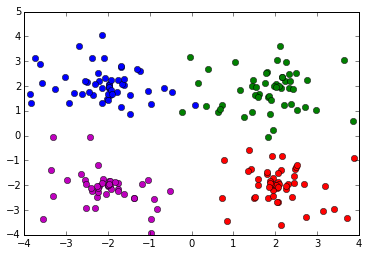

In [3]:
nclass = 4
cstrs = ['ro','bo','go','mo','co','yo']
x,y = fxy2d(m=200, nclass=nclass, center=[[2,-2], [-2,2], [2,2], [-2,-2]])

for i in range(nclass):
    plt.plot(x[0, y[i,:]==1], x[1, y[i,:]==1], cstrs[i])


(5, 441) (4, 441)


/Users/Oscar/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/Oscar/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


/Users/Oscar/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


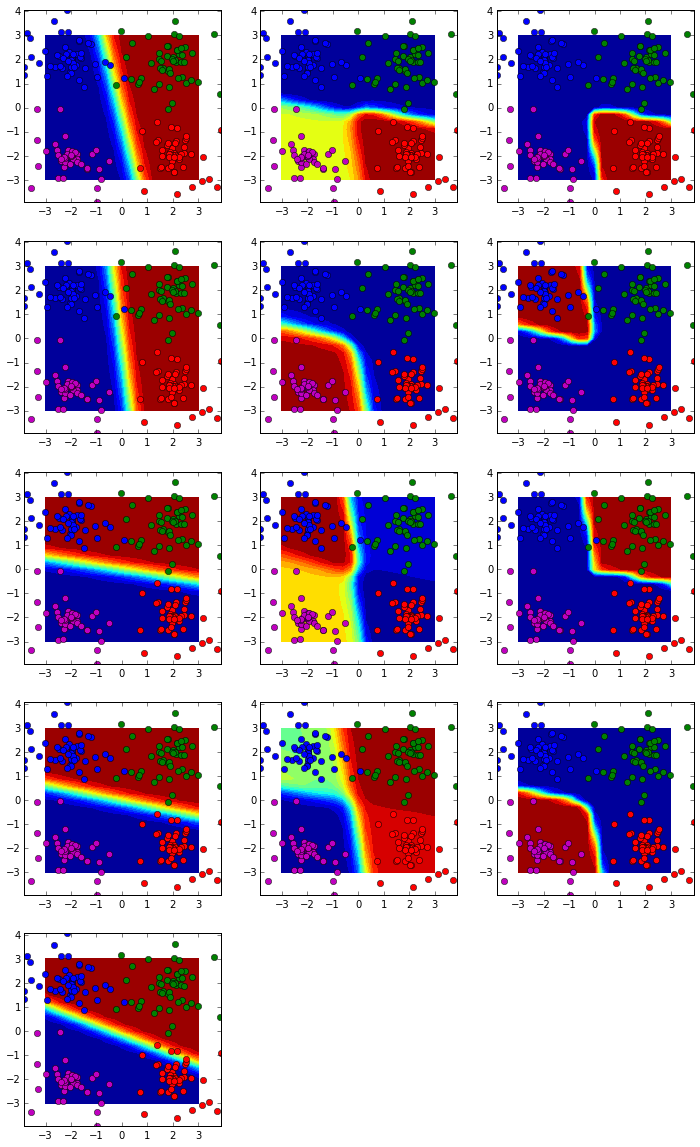

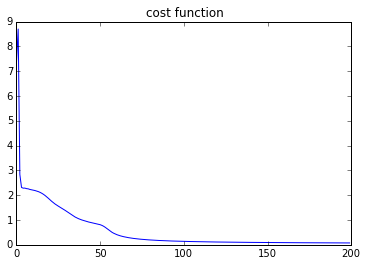

In [4]:
# NN learning
nnmodel = NN(ndims=[x.shape[0], 5, 4, y.shape[0]], activation=['sigmoid'])
costs = nnmodel.flearning(x, y, scaling=True, loss='log', regu=0, lrate=0.03, niter=200)

# prediction
npic = 21
xx,yy = np.meshgrid(np.linspace(-3,3,npic), np.linspace(-3,3,npic))
pr = nnmodel.fpredict(np.append( xx.reshape(1, npic**2), yy.reshape(1, npic**2), axis=0))

print pr[0].shape, pr[1].shape

# plots
ncol = nnmodel.nlayer
nrow = np.max(nnmodel.ndims[1:])
plt.figure(1, figsize=(ncol*4, nrow*4))
for irow in range(nrow):
    for icol in range(ncol):
        if irow < nnmodel.ndims[icol+1]:
            plt.subplot(nrow,ncol,irow*ncol+icol+1)
            for i in range(nclass):
                plt.plot(x[0, y[i,:]==1], x[1, y[i,:]==1], cstrs[i])
            plt.contourf(xx,yy, pr[icol][irow,:].reshape(npic,npic), 20)
            #plt.colorbar()

plt.figure(2)
plt.plot(costs)
plt.title('cost function')


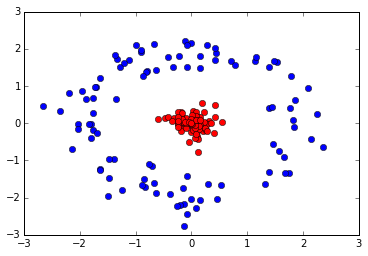

In [45]:
nclass = 2
cstrs = ['ro','bo','go','mo','co','yo']
x,y = fxy2d_circle(m=200, nclass=nclass)

for i in range(nclass):
    plt.plot(x[0, y[i,:]==1], x[1, y[i,:]==1], cstrs[i])


(5, 441) (2, 441)


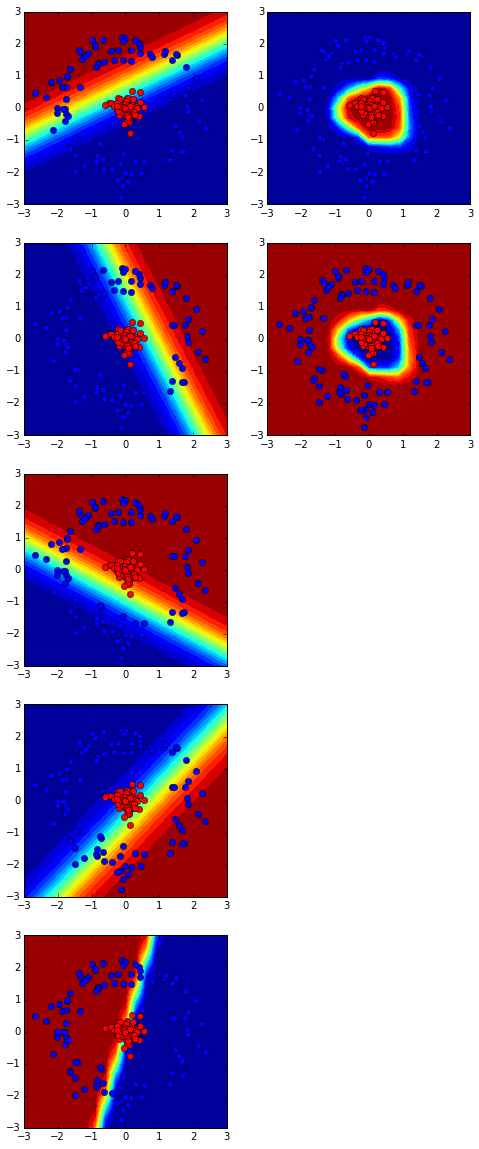

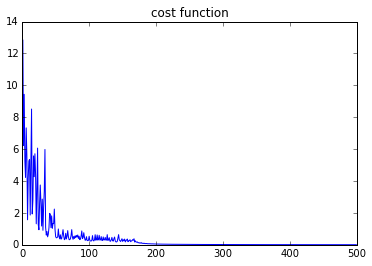

In [49]:
# NN learning
nnmodel = NN(ndims=[x.shape[0], 5, y.shape[0]], activation=['sigmoid'])
costs = nnmodel.flearning(x, y, scaling=True, loss='log', regu=0, lrate=0.1, niter=500)

# prediction
npic = 21
xx,yy = np.meshgrid(np.linspace(-3,3,npic), np.linspace(-3,3,npic))
pr = nnmodel.fpredict(np.append( xx.reshape(1, npic**2), yy.reshape(1, npic**2), axis=0))

print pr[0].shape, pr[1].shape

# plots
ncol = nnmodel.nlayer
nrow = np.max(nnmodel.ndims[1:])
plt.figure(1, figsize=(ncol*4, nrow*4))
for irow in range(nrow):
    for icol in range(ncol):
        if irow < nnmodel.ndims[icol+1]:
            plt.subplot(nrow,ncol,irow*ncol+icol+1)
            for i in range(nclass):
                plt.plot(x[0, y[i,:]==1], x[1, y[i,:]==1], cstrs[i])
            plt.contourf(xx,yy, pr[icol][irow,:].reshape(npic,npic), 20)
            #plt.colorbar()

plt.figure(2)
plt.plot(costs)
plt.title('cost function')


### 2.2 Tensorflow Neural Network Playground

http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.27166&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false


### 2.3 Scikit-learn

http://scikit-learn.org/stable/modules/neural_networks_supervised.html

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier


#### 2.3.1 2D cases

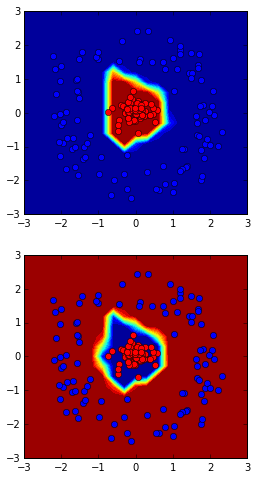

In [96]:
nclass = 2
cstrs = ['ro','bo','go','mo','co','yo']
x,y = fxy2d_circle(m=200, nclass=nclass)


# learning 
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, \
        hidden_layer_sizes=(5,), random_state=1, \
        activation='relu', batch_size='auto', \
        beta_1=0.9, beta_2=0.999, early_stopping=False, \
        epsilon=1e-08, learning_rate='constant', \
        learning_rate_init=0.03, max_iter=200, momentum=0.9, \
        nesterovs_momentum=True, power_t=0.5, shuffle=True, \
        tol=0.0001, validation_fraction=0.001, verbose=False, \
        warm_start=False)

clf.fit(x.T, y.T)
#clf.fit(np.append(x, x**2, axis=0).T, y.T)

# prediction
npic = 21
xx,yy = np.meshgrid(np.linspace(-3,3,npic), np.linspace(-3,3,npic))
x2 = np.append( xx.reshape(npic**2, 1), yy.reshape(npic**2, 1), axis=1)
pr = clf.predict_proba(x2)
#pr = clf.predict_proba(np.append(x2,x2**2,axis=1))


# plots
plt.figure(1, figsize=(4,8))
for irow in range(2):
    plt.subplot(2,1,irow+1)
    for i in range(nclass):
        plt.plot(x[0, y[i,:]==1], x[1, y[i,:]==1], cstrs[i])
    plt.contourf(xx,yy, pr[:,irow].reshape(npic,npic), 20)
    #plt.colorbar()

#plt.figure(2)
#plt.plot(costs)
#plt.title('cost function')


#### 2.3.2 High-dimension case: image recogonition

In [97]:
# read handwriting digits image data
data_x = np.genfromtxt('data_x.csv', delimiter=',')
data_y = np.genfromtxt('data_y.csv', delimiter=',')

print data_x.shape, data_y.shape

(5000, 400) (5000,)


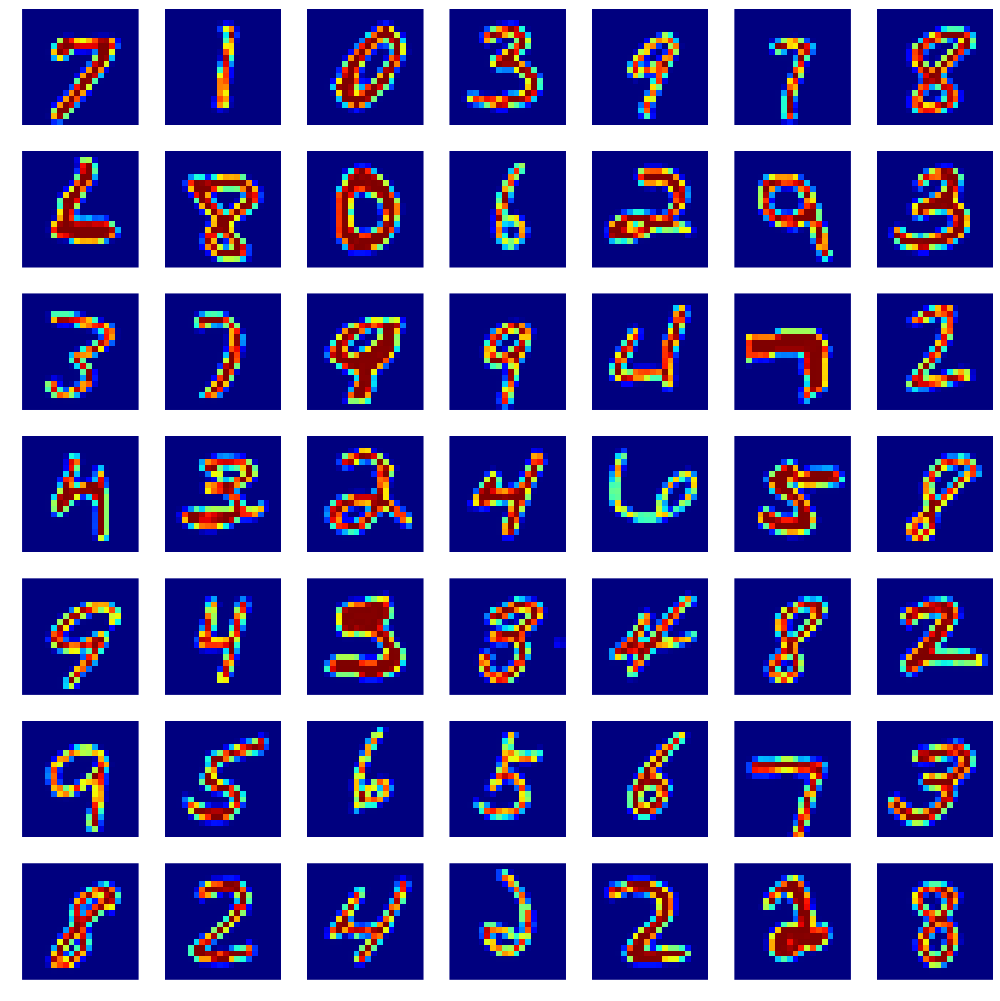

In [90]:
# show some images from the dataset
npic = 7
plt.figure(1, figsize=(2*npic, 2*npic) )
k = np.random.choice(5000, npic*npic, replace=False)
for i in range(npic):
    for j in range(npic):
        plt.subplot(npic, npic, i*npic+j+1)
        plt.imshow(data_x[k[i*npic+j], :].reshape(20,20).T, interpolation='none', vmin=0, vmax=1)
        plt.axis('off')
plt.tight_layout()


In [124]:
# trainning
ntrain = 3000;  ntest = 1000

k = np.random.choice(5000, ntrain+ntest, replace=False)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, \
        hidden_layer_sizes=(25,), random_state=1, \
        activation='relu', batch_size='auto', \
        beta_1=0.9, beta_2=0.999, early_stopping=False, \
        epsilon=1e-08, learning_rate='constant', \
        learning_rate_init=0.03, max_iter=200, momentum=0.9, \
        nesterovs_momentum=True, power_t=0.5, shuffle=True, \
        tol=0.0001, validation_fraction=0.001, verbose=False, \
        warm_start=False)

clf.fit(data_x[k[0:ntrain], :], data_y[k[0:ntrain]])


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.03, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.001,
       verbose=False, warm_start=False)

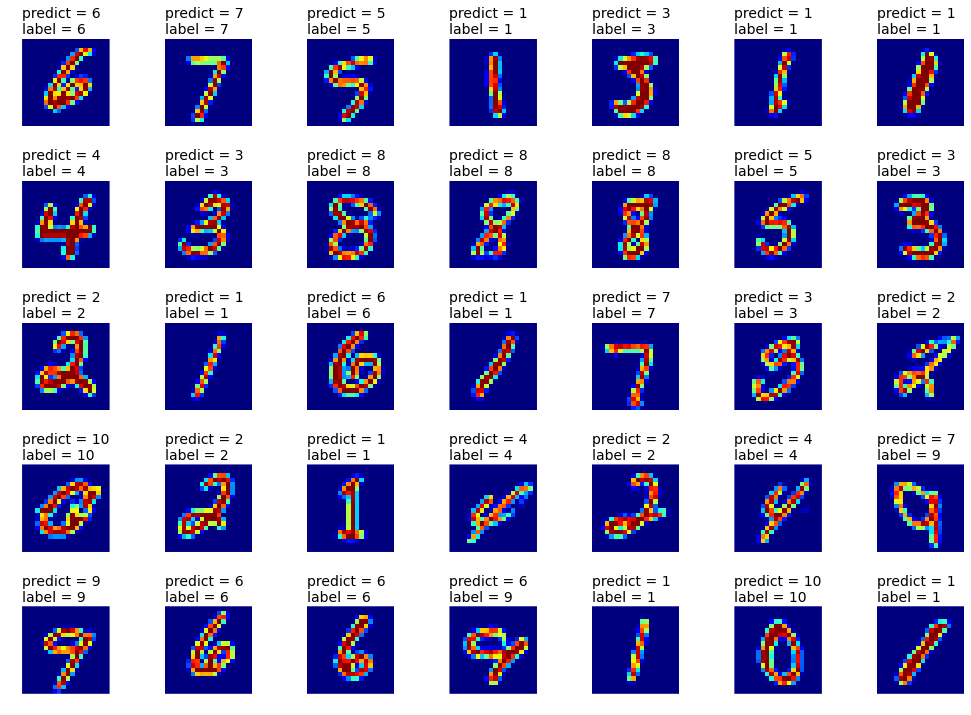

In [125]:
# prediction

npic = 7; nrow = 5
pr = clf.predict(data_x[k[ntrain:ntrain+npic*nrow], :])

plt.figure(1, figsize=(2*npic, 2*nrow) )
for i in range(nrow):
    for j in range(npic):
        plt.subplot(nrow, npic, i*npic+j+1)
        plt.imshow(data_x[k[ntrain+i*npic+j], :].reshape(20,20).T, \
                   interpolation='none', vmin=0, vmax=1)
        plt.axis('off')
        plt.title('predict = '+format(int(pr[i*npic+j]))+'\nlabel = '+ \
                  format(int(data_y[k[ntrain+i*npic+j]])), 
                  fontsize=14, loc='left')
plt.tight_layout()


In [126]:
# performance on the test set
pr    = clf.predict(data_x[k[ntrain:ntrain+ntest], :]).astype(int)
label = data_y[k[ntrain:ntrain+ntest]].astype(int)

print 'Test score: ', len(label[pr==label])*1.0/ntest*100,'%'


Test score:  91.0 %


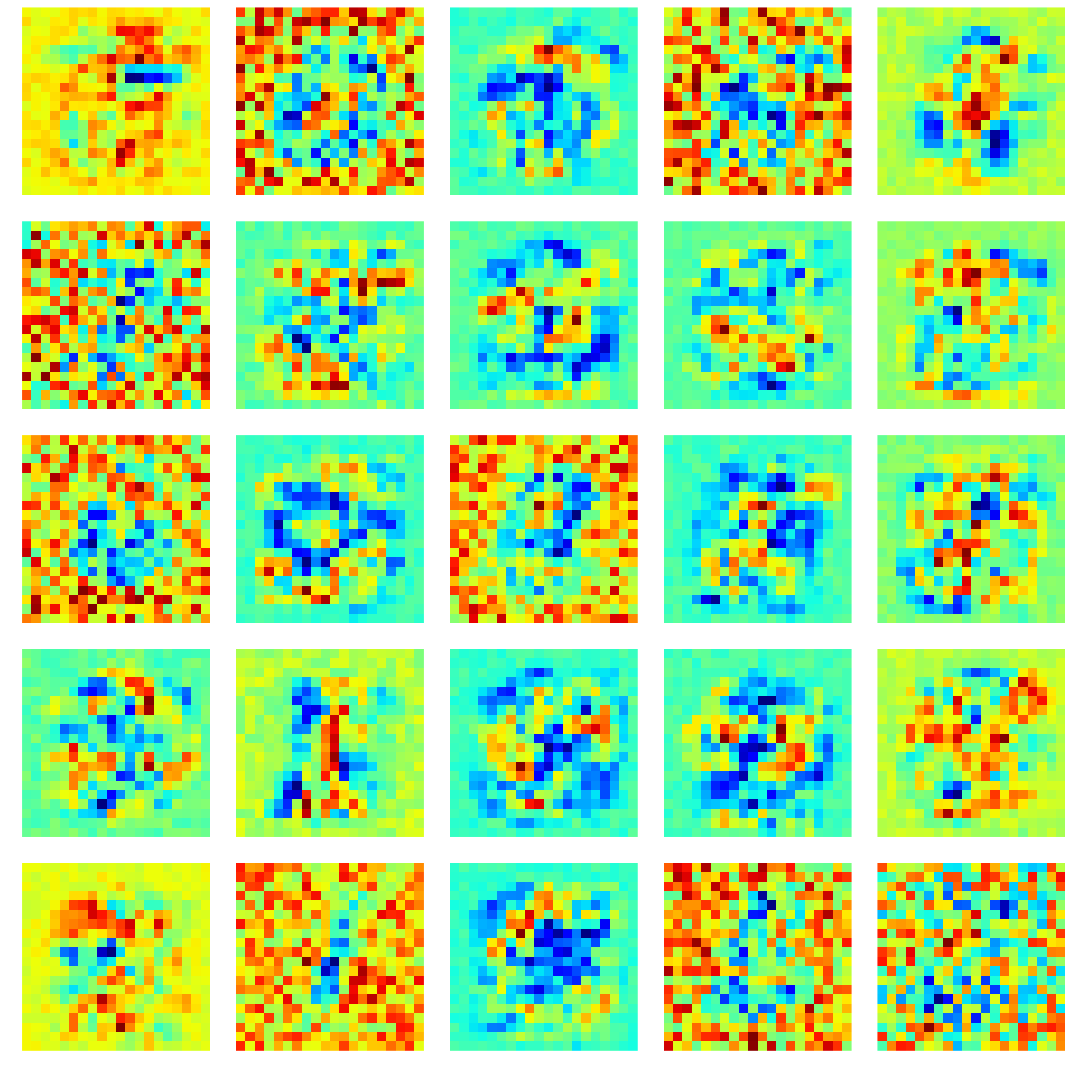

In [129]:
# visualize the first hidden layer weights
wts = clf.coefs_[0].T
ncol = 5; nrow = 5

plt.figure(1, figsize=(3*ncol, 3*nrow) )
for i in range(nrow):
    for j in range(ncol):
        plt.subplot(nrow, ncol, i*ncol+j+1)
        plt.imshow(wts[i*ncol+j].reshape(20,20).T, \
                   interpolation='none')
        plt.axis('off')
plt.tight_layout()



#### 2.3.3 More examples

a) Tuning parameters

http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py

http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py

http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py


b) Autonomous game playing

https://www.youtube.com/watch?v=qv6UVOQ0F44

https://www.youtube.com/watch?v=S9Y_I9vY8Qw

https://www.youtube.com/watch?v=P7XHzqZjXQs

